<CENTER>
    <a href="http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html" class="icons"><img src="../../images/ATLASOD.gif" style="width:40%"></a>
</CENTER>

# A simple introductional notebook to HEP analysis in python
<p> In this notebook you can find an easy set of commands that show the basic computing techniques commonly used in high energy  physics (HEP) analyzes. It also shows how to create a histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. At the end you get a plot with the number of leptons.</p>


<CENTER><h1>Simple pyROOT notebook example</h1></CENTER>

The library used is ROOT - a scientific software framework that provides all the functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

First of all ROOT is imported to read the files in the _.root_ data format. A _.root_ file consists of a tree having branches and leaves. At this point you could also import further programs that contain other formulas that you maybe use more often. But here we don't import other programs to keep it simple.

In [1]:
import ROOT

Welcome to JupyROOT 6.24/00


In order to activate the interactive visualisation of the histogram that is later created we can use the JSROOT magic 

*(if gives yo an error, don't worry, it maybe that your ROOT is simply too old)*

In [1]:
#%jsroot on

### The following analysis is searching for events where [Z bosons](https://en.wikipedia.org/wiki/W_and_Z_bosons) decay to two leptons of same flavour and opposite charge (to be seen for example in the [Feynman diagram](https://en.wikipedia.org/wiki/Feynman_diagram)).

<CENTER><img src="../../images/Z_ElectronPositron.png" style="width:30%"></CENTER>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file.

In [2]:
f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_110910.ZPrime3000.root") ## 8 TeV sample
##f = ROOT.TFile.Open("/home/student/datasets/MC/mc_105987.WZ.root") ## local file exampl

After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _a first way to plot a variable_. The two following arguments define the width and the height of the canvas.

In [3]:
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",800,600)

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file.

In [4]:
tree = f.Get("mini")

In [5]:
tree.GetEntries()

19634

Now we define a histogram that will later be placed on this canvas. Its name is _variable_ and the header of the histogram is _Example plot: Number of leptons_. The three following arguments indicate that this histogram contains 4 so called bins which have a range from 0 to 4.

In [6]:
hist = ROOT.TH1F("variable","Example plot: Number of leptons; Number of leptons ; Events ",5,-0.5,4.5)

The following lines are a loop that goes over the data that is stored in the tree and fills the histogram _h_ that we already defined. In this first notebook we don't do any cuts to keep it simple. Accordingly the loop fills the histogram for each event stored in the tree. After the program has looped over all the data it prints the word __Done!__.

In [7]:
for event in tree:
    hist.Fill(tree.lep_n)
    
print("Done!")

Done!


After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies.

In [8]:
hist.SetFillColor(92)
hist.Draw()

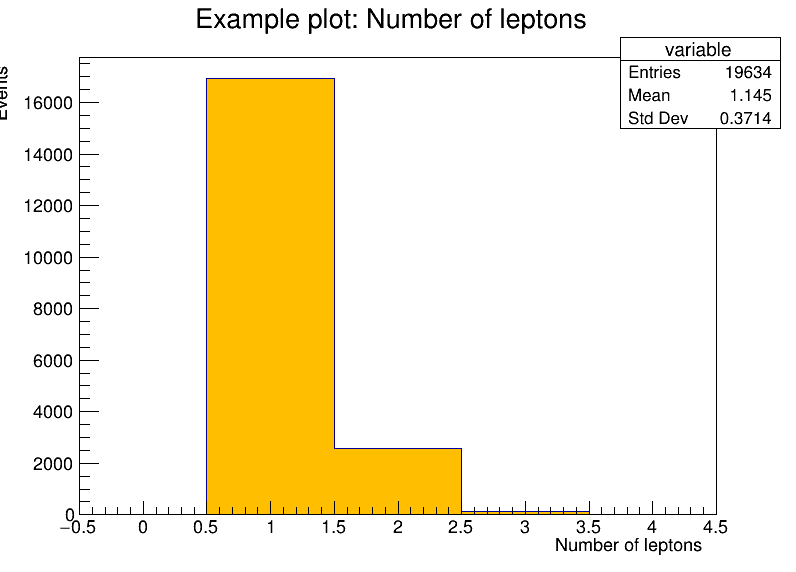

In [9]:
canvas.Draw()

The next cell will rescale the histogram to one (1).
This will allow to see proportions in the histogram itself.
**This is called normalisation**

In [10]:
scale = hist.Integral()
hist.Scale(1/scale)
hist.SetFillColor(35)


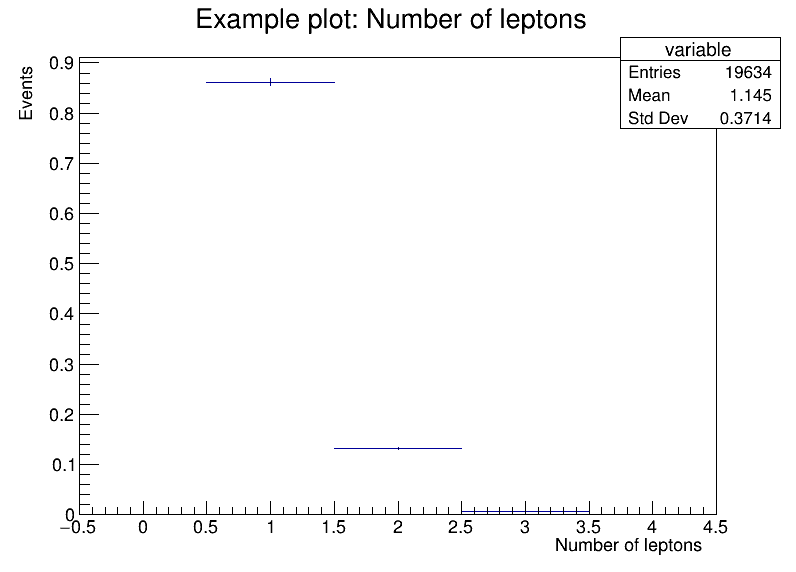

In [11]:
hist.Draw()
canvas.Draw("hist")

**Done!**